# Instructions
You will submit an HTML document to Canvas as your final version.

Your document should show your code chunks/cells as well as any output. Make sure that only relevant output is printed. Do not, for example, print the entire dataset in your final knitted file.

Your document should also be clearly organized, so that it is easy for a reader to find your answers to each question.

There may be a small penalty for submissions that are difficult to read or navigate.

# Part One: Data Exploration
The dataset we will study for this assignment contains information about health insurance costs for individuals with no dependents (children) in the United States. The information contained in the data is:

- Age of primary beneficiary

- Gender of primary beneficiary (only female, male recorded)

- Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

- Whether the beneficiary smokes

- The beneficiary’s residential area in the US, northeast, southeast, southwest, northwest.

- Individual medical costs billed by health insurance

You can find this data at: https://www.dropbox.com/s/bocjjyo1ehr5auz/insurance_costs_1.csv?dl=1

1. Read in the dataset, and display some summaries of the data.


In [226]:
import pandas as pd
import numpy as np

insurance = pd.read_csv("/Users/dan/calpoly/BusinessAnalytics/GSB544MACHINE/Week6/data/insurance_costs_1.csv")
print(insurance.head())
insurance.describe(include= "all")

   age     sex     bmi smoker     region      charges
0   19  female  27.900    yes  southwest  16884.92400
1   33    male  22.705     no  northwest  21984.47061
2   32    male  28.880     no  northwest   3866.85520
3   31  female  25.740     no  southeast   3756.62160
4   60  female  25.840     no  northwest  28923.13692


,age,sex,bmi,smoker,region,charges
count,431.000000,431,431.000000,431,431,431.000000
unique,NaN,2,NaN,2,4,NaN
top,NaN,female,NaN,no,southeast,NaN
freq,NaN,225,NaN,344,125,NaN
mean,37.960557,NaN,30.768898,NaN,NaN,12297.098118
std,16.363909,NaN,6.111362,NaN,NaN,11876.527128
min,18.000000,NaN,15.960000,NaN,NaN,1131.506600
25%,22.000000,NaN,26.357500,NaN,NaN,2710.444575
50%,34.000000,NaN,30.590000,NaN,NaN,9866.304850
75%,55.000000,NaN,35.272500,NaN,NaN,14510.872600



2. Fix any concerns you have about the data.

Looking at the data, in order to get the data ready to use I am first going to make sure there are no NaN values by dropping them. Then I am going to create dummy variables for the categorical variable types as well as standardize the numerical variables. Below is what the data frame will look like after cleaning.

In [227]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# Drop Nan values
insurance_drop = insurance.dropna()
# Create ct for dummifying variables
ct = ColumnTransformer(
  [
    ("dummify", OneHotEncoder(sparse_output = False), ["sex", "smoker", "region"]),
    ("standardize", StandardScaler(), ["charges", "bmi"])
  ],
  remainder = "passthrough"
)
# transform the data to have new variables and display as a df
insurance_transformed = ct.fit_transform(insurance_drop)
# Get the names for the encoded columns and standardized columns
encoded_cols = ct.named_transformers_["dummify"].get_feature_names_out(["sex", "smoker", "region"])
all_columns = list(encoded_cols) + ["age", "bmi", "charges"]

# Convert the transformed array to a DataFrame with column names
df_transformed = pd.DataFrame(insurance_transformed, columns=all_columns)

df_transformed.head()

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.386742,-0.469982,19.0
1,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.816622,-1.321026,33.0
2,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,-0.710649,-0.309439,32.0
3,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,-0.719941,-0.823833,31.0
4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.401534,-0.807451,60.0


3. Make up to three plots comparing the response variable (charges) to one of the predictor variables. Briefly discuss each plot.

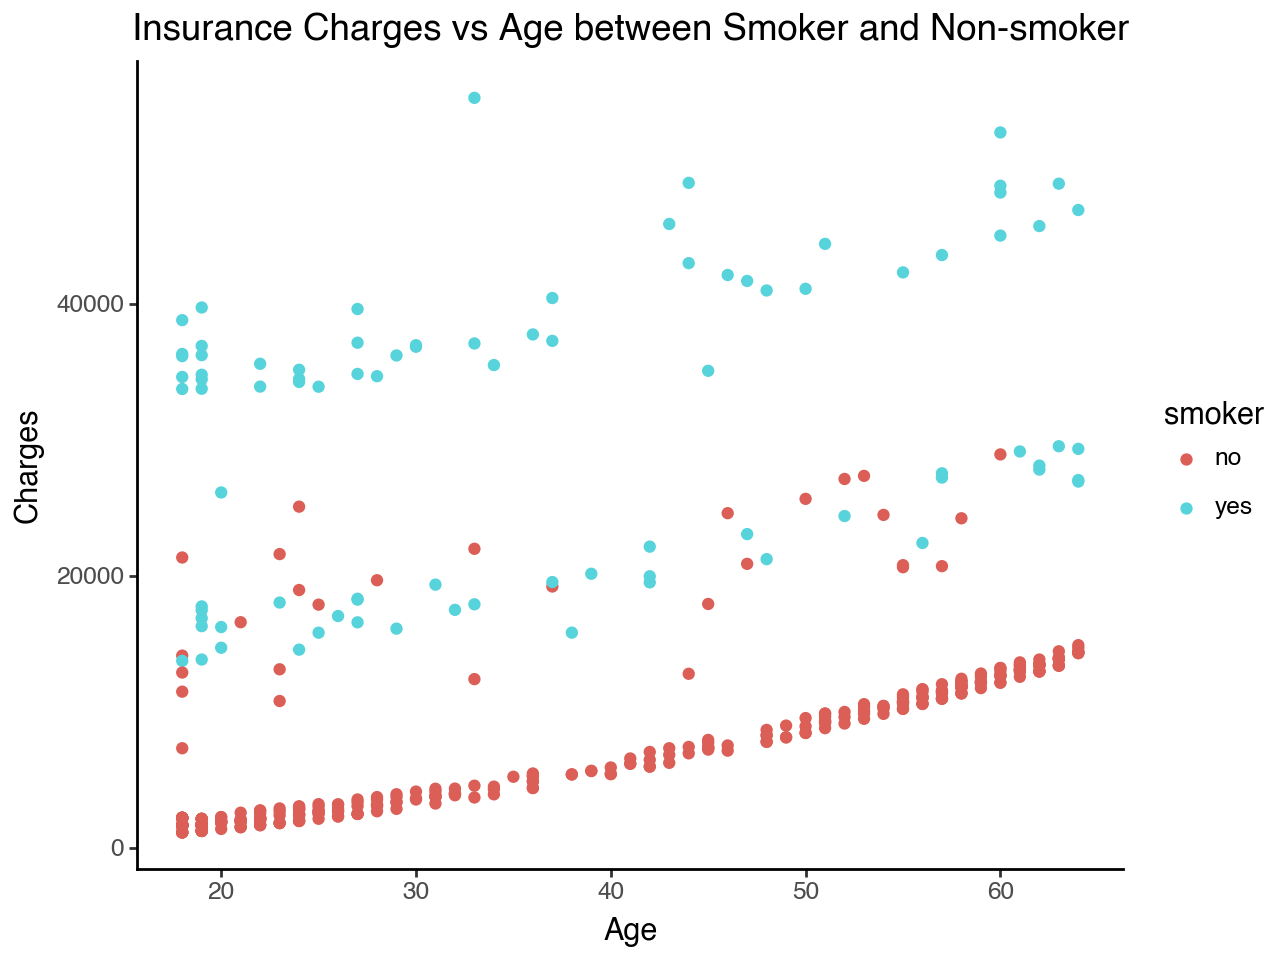

In [228]:
from plotnine import ggplot, aes, geom_point, labs, theme_classic

plot_age = (ggplot(insurance,aes(
  x = "age",
  y = "charges",
  color = "smoker"
))
+ geom_point()
+labs(title="Insurance Charges vs Age between Smoker and Non-smoker",
                     x="Age",
                     y="Charges")
+ theme_classic())

plot_age.show()

In the scatter plot above we can clearly see that people who smoke spend more on insurance. Also we are shown that if someone is a non-smoker then then will spend a similar amount as other non-smokers; where if someone smokes the charges vary. Then we can also identify that as people get older their charges tend to increase. 

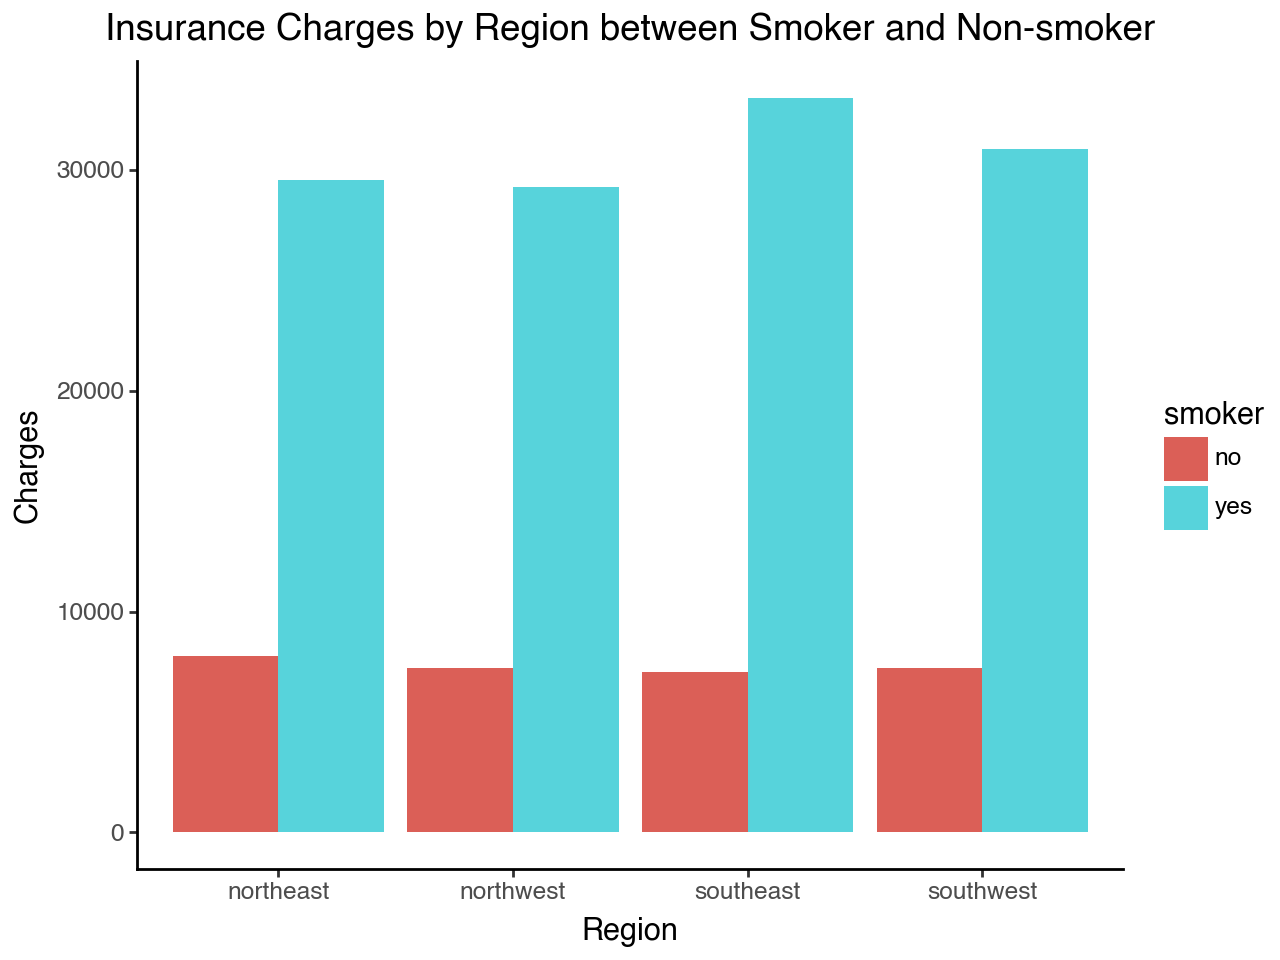

In [229]:
from plotnine import geom_bar

reg_insurance_smoke = insurance[insurance["smoker"] == "yes"]
reg_insurance_nosmoke = insurance[insurance["smoker"] == "no"]
reg_insurance_smoke = reg_insurance_smoke.groupby("region", as_index=False)["charges"].mean()
reg_insurance_nosmoke = reg_insurance_nosmoke.groupby("region", as_index=False)["charges"].mean()

region = pd.merge(reg_insurance_smoke, reg_insurance_nosmoke, on= "region")

region_melted = region.melt(id_vars='region', value_vars=['charges_x', 'charges_y'],
                    var_name='smoker', value_name='charges')

region_melted['smoker'] = region_melted['smoker'].replace({
    'charges_x': 'yes',  # New name for charges_x
    'charges_y': 'no'   # New name for charges_y
})

# Create the bar plot
plot_region = (
    ggplot(region_melted, aes(
        x='region', 
        y='charges', 
        fill='smoker')) +
    geom_bar(stat='identity', position='dodge') + 
    labs(title='Insurance Charges by Region between Smoker and Non-smoker', x='Region', y='Charges') +
    theme_classic())

plot_region.show()

In this bar graph we can see that by region there is little variation in the mean charges between each region. This tells us region will not be a great predictor variable. In terms of smokers vs non-smokers though, we again see that there is a spending gap between the two demographics. Furthermore, when looking at the mean charges for smokers we see some variation, thus an interaction term may be effective.

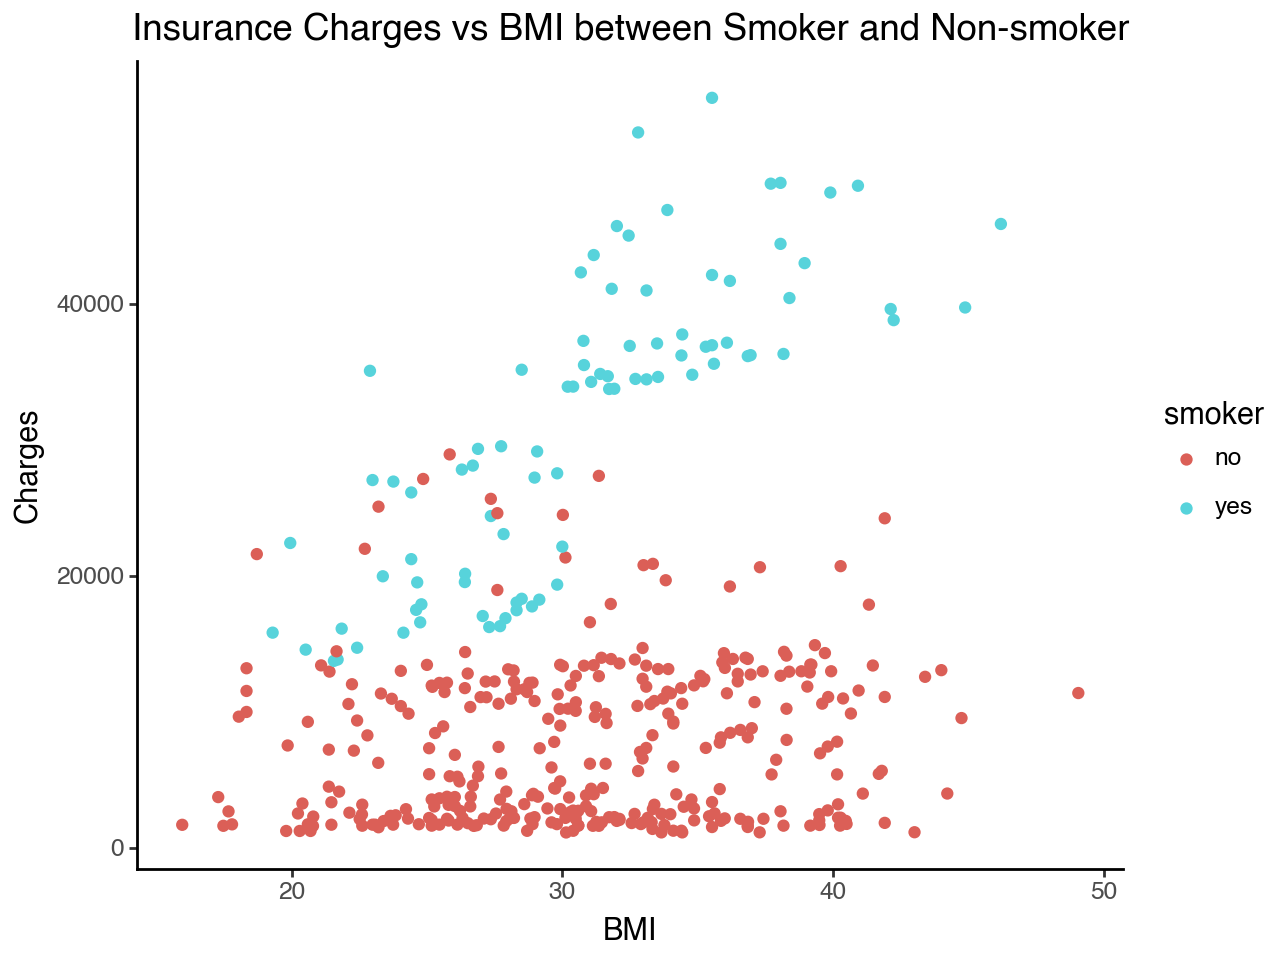

In [230]:
plot_bmi = (ggplot(insurance,aes(
  x = "bmi",
  y = "charges",
  color = "smoker"
))
+ geom_point()
+labs(title="Insurance Charges vs BMI between Smoker and Non-smoker",
                     x="BMI",
                     y="Charges")
+ theme_classic())

plot_bmi.show()

Looking at this scatter plot, we can see that for non-smokers there is no helpful pattern connecting BMI to insurance charges. However, for teh smokers we see an upward trend, thus an interaction variable may be needed to capture the shape of this distribution.
# Part Two: Simple Linear Models
1. Construct a simple linear model to predict the insurance charges from the beneficiary’s age. Discuss the model fit, and interpret the coefficient estimates.

In [231]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import sklearn as sk 

# Create ct
ct = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)

# Create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
)

# Conduct simple regression
y = insurance["charges"]
X = insurance[["age"]]
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit using test/train data
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)
y_preds = lr_pipeline_fitted.predict(X_test)

# Calcuate r squared
r2q1 = r2_score(y_test, y_preds)
mseq1 = sk.metrics.mean_squared_error(y_test, y_preds)

# Finding the regression coefficients
linear_model = lr_pipeline_fitted.named_steps['linear_regression']  # Access the fitted LinearRegression model
coefficients = linear_model.coef_  # Get the coefficients
intercept = linear_model.intercept_  # Get the intercept

print("R-squared:", r2q1)
print("Coefficients:", coefficients)
print("Intercept:", intercept)

R-squared: 0.07933481593323632
Coefficients: [3679.51164183]
Intercept: 12951.922885043341


Here we see that only using age as a predictor does a bad job of explaining the data as we get a low R squared value less than 0.01; thus, this model only explains around 1% of the data. From our coefficients we see that for every year gained the model predicts that insurance costs increase by a little less than 4,000. The intercept tells us where a "age 0" candidate would be charged for insurance, we use this as a starting point and will add about 4,000 for every year gained in this model.  

2. Make a model that also incorporates the variable sex. Report your results.


In [84]:
# Create ct
ct2 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"]),
    ("dummy", OneHotEncoder(), ["sex"])
  ],
  remainder = "drop"
)

# Create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct2),
  ("linear_regression", LinearRegression())]
)

# Conduct simple regression
y = insurance["charges"]
X = insurance[["age", "sex"]]
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit using test/train data
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)
y_preds = lr_pipeline_fitted.predict(X_test)

# Calcuate r squared and mse
r2q2 = r2_score(y_test, y_preds)
mseq2 = sk.metrics.mean_squared_error(y_test, y_preds)


# Finding the regression coefficients
linear_model = lr_pipeline_fitted.named_steps['linear_regression']  # Access the fitted LinearRegression model
coefficients = linear_model.coef_  # Get the coefficients
intercept = linear_model.intercept_  # Get the intercept

print("R-squared:", r2q2)
print("Coefficients:", coefficients)
print("Intercept:", intercept)

R-squared: 0.03474031080737383
Coefficients: [4040.14296241 -582.39735581  582.39735581]
Intercept: 12236.67276156687



In this model we see that it does a better job at explaining the model, sitting around 15% explained. We also see that the addition of a year now only adds around 3,000 instead of 4,000. This is because the model is now taking in more information and determined that age has less of an effect. On top of age now we have coefficients for sex, the around -600 and 600 tell us that there is an effect of sex in the model. In other words, the model now takes into consideration your sex and will add or subtract about 600 based on if you are a male or female. Then we don't see much of a change in the intercept.

3. Now make a model that does not include sex, but does include smoker. Report your results.

In [85]:
# Create ct
ct3 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"]),
    ("dummy", OneHotEncoder(), ["smoker"])
  ],
  remainder = "drop"
)

# Create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct3),
  ("linear_regression", LinearRegression())]
)

# Conduct simple regression
y = insurance["charges"]
X = insurance[["age", "smoker"]]
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit using test/train data
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)
y_preds = lr_pipeline_fitted.predict(X_test)

# Calcuate r squared and mse
r2q3 = r2_score(y_test, y_preds)
mseq3 = sk.metrics.mean_squared_error(y_test, y_preds)

# Finding the regression coefficients
linear_model = lr_pipeline_fitted.named_steps['linear_regression']  # Access the fitted LinearRegression model
coefficients = linear_model.coef_  # Get the coefficients
intercept = linear_model.intercept_  # Get the intercept

print("R-squared:", r2q3)
print("Coefficients:", coefficients)
print("Intercept:", intercept)

R-squared: 0.7122120635803861
Coefficients: [  4156.84487633 -11967.51675195  11967.51675195]
Intercept: 19270.661518217006


Now we see that being or not being a smoker helps explain the data much better than the previous models. The R squared is now about 0.75, this model explains about 75% of the data. Also, now being a smoker causes your insurance to increase by about 12,000, every year still adds about 4,000, and a "age 0" person starts with a higher baseline insurance charge at about 20,000.

4. Which model (Q2 or Q3) do you think better fits the data? Justify your answer by calculating the MSE for each model, and also by comparing R-squared values.

In [111]:
print(f"{'Model':<10} {'MSE':<20} {'R2':<10}")
print(f"{'Model 2':<10} {round(mseq2, 2):<20} {round(r2q2, 2):<10}")
print(f"{'Model 3':<10} {round(mseq3, 2):<20} {round(r2q3, 2):<10}")

Model      MSE                  R2        
Model 2    149234428.61         0.03      
Model 3    40350541.46          0.71      


Based off of the metrics calculated above Model 3 fits the data better because it has a greater R-squared value and smaller MSE.


# Part Three: Multiple Linear Models
Now let’s consider including multiple quantitative predictors.

1. Fit a model that uses age and bmi as predictors. (Do not include an interaction term, age*bmi, between these two.) Report your results. How does the MSE compare to the model in Part Two Q1? How does the R-squared compare?

In [112]:
# Create ct
ct4 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"])
  ],
  remainder = "drop"
)

# Create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct4),
  ("linear_regression", LinearRegression())]
)

# Conduct simple regression
y = insurance["charges"]
X = insurance[["age", "bmi"]]
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit using test/train data
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)
y_preds = lr_pipeline_fitted.predict(X_test)

# Calcuate r squared and mse
r2q4 = r2_score(y_test, y_preds)
mseq4 = sk.metrics.mean_squared_error(y_test, y_preds)

# Finding the regression coefficients
linear_model = lr_pipeline_fitted.named_steps['linear_regression']  # Access the fitted LinearRegression model
coefficients = linear_model.coef_  # Get the coefficients
intercept = linear_model.intercept_  # Get the intercept

print(f"{'Model':<10} {'MSE':<20} {'R2':<10}")
print(f"{'Model 1':<10} {round(mseq1, 2):<20} {round(r2q1, 2):<10}")
print(f"{'Model 4':<10} {round(mseq4, 2):<20} {round(r2q4, 2):<10}")

Model      MSE                  R2        
Model 1    140575248.17         0.01      
Model 4    141192948.54         0.16      


Here we see that the two models have similar MSE but Model 4 has a greater r-squared. Thus, Model 4 is a better fit.

2. Perhaps the relationships are not linear. Fit a model that uses age and age^2 as predictors. How do the MSE and R-squared compare to the model in P2 Q1?

In [115]:
# Create age squared variable
insurance['age_squared'] = insurance['age'] ** 2

# Create ct
ct5 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "age_squared"])
  ],
  remainder = "drop"
)

# Create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct5),
  ("linear_regression", LinearRegression())]
)

# Conduct simple regression
y = insurance["charges"]
X = insurance[["age", "age_squared"]]
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit using test/train data
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)
y_preds = lr_pipeline_fitted.predict(X_test)

# Calcuate r squared and mse
r2q5 = r2_score(y_test, y_preds)
mseq5 = sk.metrics.mean_squared_error(y_test, y_preds)

# Finding the regression coefficients
linear_model = lr_pipeline_fitted.named_steps['linear_regression']  # Access the fitted LinearRegression model
coefficients = linear_model.coef_  # Get the coefficients
intercept = linear_model.intercept_  # Get the intercept

print(f"{'Model':<10} {'MSE':<20} {'R2':<10}")
print(f"{'Model 1':<10} {round(mseq1, 2):<20} {round(r2q1, 2):<10}")
print(f"{'Model 5':<10} {round(mseq5, 2):<20} {round(r2q5, 2):<10}")

Model      MSE                  R2        
Model 1    140575248.17         0.01      
Model 5    108443798.86         0.12      


Here again we see that the relationship for age is not linear. This is because when adding teh age squared variable to teh model, the R squared metric increased. Also we see that the MSE is lower for Model 5, indicating even more that Model 5 is a better fit.

3. Fit a polynomial model of degree 4. How do the MSE and R-squared compare to the model in P2 Q1?

In [119]:
# Create ct
ct6 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)

# Create pipeline
lr_pipeline = Pipeline(
    [("preprocessing", ct6),
      ("poly", PolynomialFeatures(degree=4)),
        ("linear_regression", LinearRegression())]
)

# Conduct simple regression
y = insurance["charges"]
X = insurance[["age"]]
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit using test/train data
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)
y_preds = lr_pipeline_fitted.predict(X_test)

# Calcuate r squared and mse
r2q6 = r2_score(y_test, y_preds)
mseq6 = sk.metrics.mean_squared_error(y_test, y_preds)

# Finding the regression coefficients
linear_model = lr_pipeline_fitted.named_steps['linear_regression']  # Access the fitted LinearRegression model
coefficients = linear_model.coef_  # Get the coefficients
intercept = linear_model.intercept_  # Get the intercept

print(f"{'Model':<10} {'MSE':<20} {'R2':<10}")
print(f"{'Model 1':<10} {round(mseq1, 2):<20} {round(r2q1, 2):<10}")
print(f"{'Model 6':<10} {round(mseq6, 2):<20} {round(r2q6, 2):<10}")

Model      MSE                  R2        
Model 1    140575248.17         0.01      
Model 6    103735648.71         0.09      


Here we see again that the new model outperforms our first simple linear model. Thus, a degree four polynomial fits the data better.

4. Fit a polynomial model of degree 12. How do the MSE and R-squared compare to the model in P2 Q1?

In [214]:
# Create ct
ct7 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)

# Create pipeline
lr_pipeline = Pipeline(
    [("preprocessing", ct7),
      ("poly", PolynomialFeatures(degree=12)),
        ("linear_regression", LinearRegression())]
)

# Conduct simple regression
y = insurance["charges"]
X = insurance[["age"]]
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit using test/train data
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)
y_preds = lr_pipeline_fitted.predict(X_test)

# Calcuate r squared and mse
r2q7 = r2_score(y_test, y_preds)
mseq7 = sk.metrics.mean_squared_error(y_test, y_preds)

# Finding the regression coefficients
linear_model = lr_pipeline_fitted.named_steps['linear_regression']  # Access the fitted LinearRegression model
coefficients = linear_model.coef_  # Get the coefficients
intercept = linear_model.intercept_  # Get the intercept

print(f"{'Model':<10} {'MSE':<20} {'R2':<10}")
print(f"{'Model 1':<10} {round(mseq1, 2):<20} {round(r2q1, 2):<10}")
print(f"{'Model 7':<10} {round(mseq7, 2):<20} {round(r2q7, 2):<10}")

Model      MSE                  R2        
Model 1    140575248.17         0.01      
Model 7    163539388.89         0.08      


Again same type of results, a degree 12 polynomial fits teh data better than a linear model when using age as the predictor variable.

5. According to the MSE and R-squared, which is the best model? Do you agree that this is indeed the “best” model? Why or why not?

Looking at the models in this section, the best model based on their metrics is the model with age and bmi as predictor variables. I agree with this as it makes sense that the model with the most variation in predictors will help fit the data the best.

6. Plot the predictions from your model in Q4 as a line plot on top of the scatterplot of your original data.

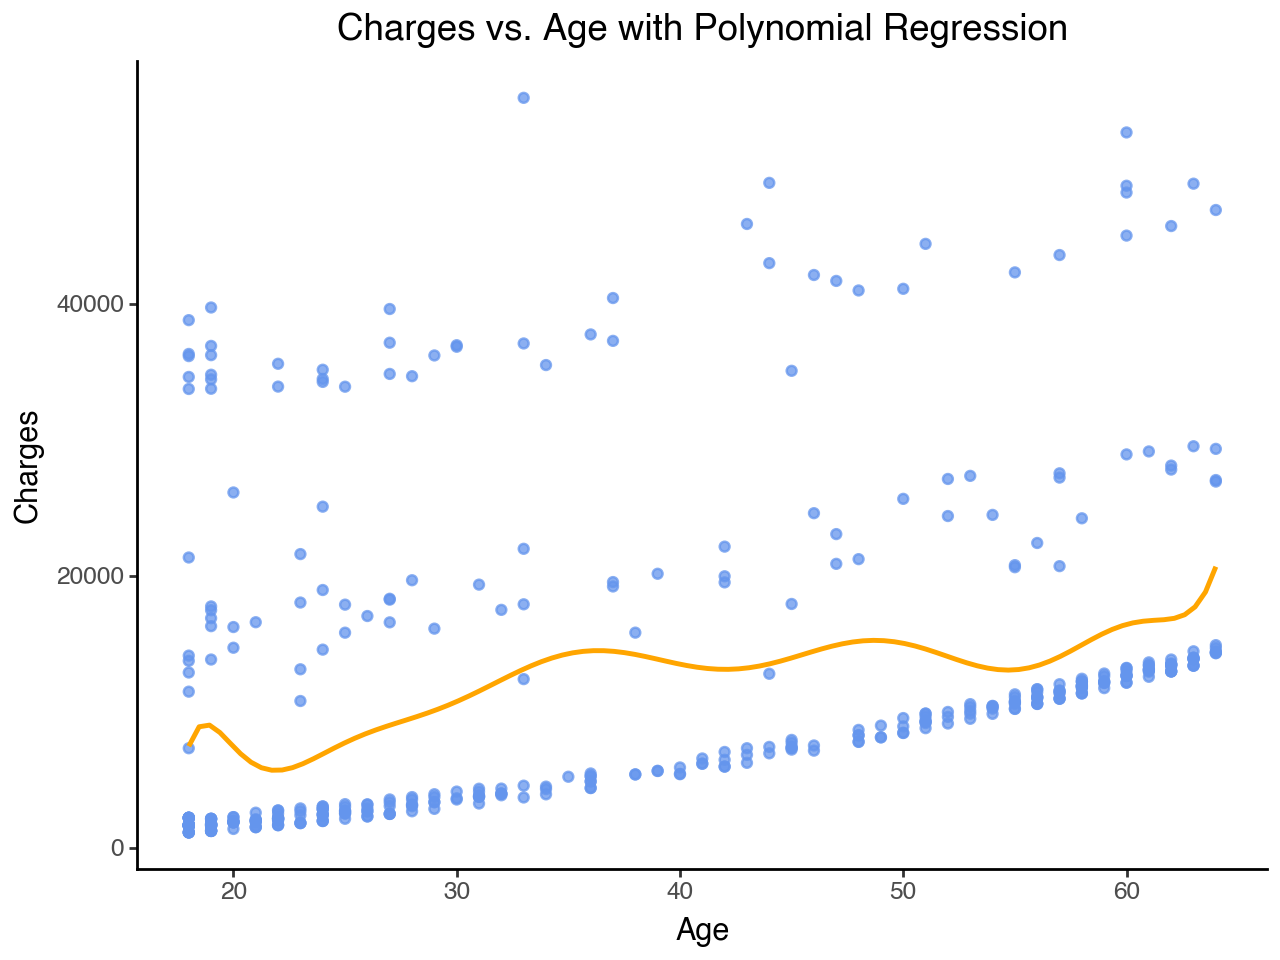

In [217]:
from plotnine import geom_line, aes

# Generate a range of ages for predictions
age_range = np.linspace(insurance["age"].min(), insurance["age"].max(), 100).reshape(-1, 1)
age_range_df = pd.DataFrame(age_range, columns=["age"])
age_range_scaled = ct7.transform(age_range_df)  # Standardize the age range

# Predict charges using the polynomial model
age_range_poly = lr_pipeline_fitted.named_steps['poly'].transform(age_range_scaled)
predicted_charges_poly = lr_pipeline_fitted.named_steps['linear_regression'].predict(age_range_poly)

# Create a DataFrame for plotting
predictions_df = pd.DataFrame({'age': age_range.flatten(), 'predicted_charges': predicted_charges_poly})

# Create a ggplot
plot = (
    ggplot() +
    geom_point(insurance, aes(x='age', y='charges'), color='cornflowerblue', alpha= .75) +  # Scatter plot of original data
    geom_line(predictions_df, aes(x='age', y='predicted_charges'), color='orange', size=1) +  # Polynomial regression line
    labs(title='Charges vs. Age with Polynomial Regression',
         x='Age',
         y='Charges') +
    theme_classic()
)

plot.show()


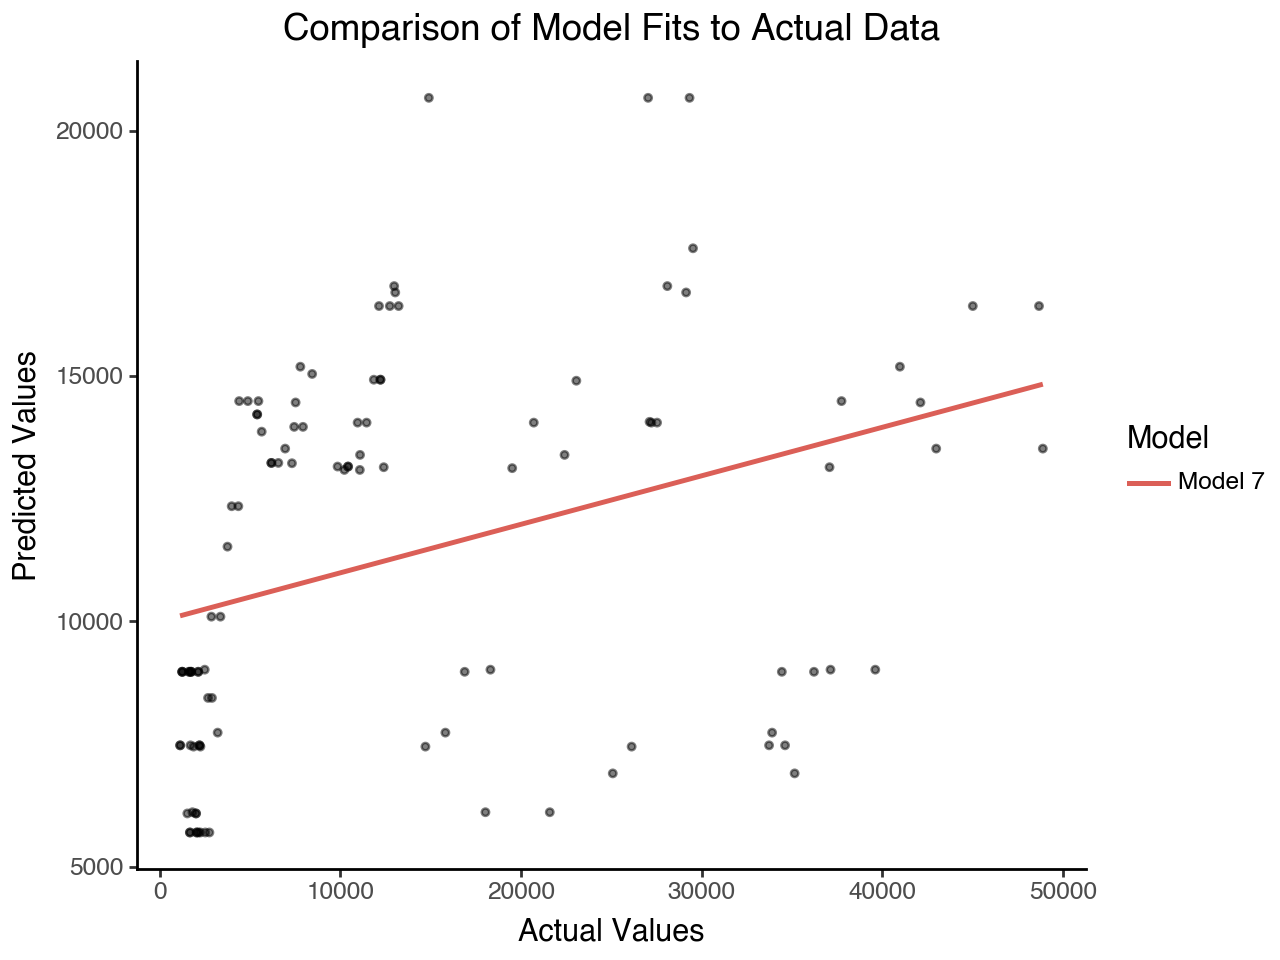

In [218]:
from plotnine import geom_smooth

plot_data = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_preds,
        'Model': "Model 7"})

plot_regression = (
    ggplot(plot_data, aes(x='Actual', y='Predicted')) +
    geom_point(color='black', alpha=0.5, size=1) +
    geom_smooth(aes(color='Model'), method='lm', se=False, linetype="solid") +
    labs(title="Comparison of Model Fits to Actual Data",
         x="Actual Values",
         y="Predicted Values") +
    theme_classic()
)

plot_regression.show()

# Part Four: New data
Great news! We’ve managed to collect data about the insurance costs for a few more individuals. You can find the new dataset here: https://www.dropbox.com/s/sky86agc4s8c6qe/insurance_costs_2.csv?dl=1

In [232]:
insurance2 = pd.read_csv("/Users/dan/calpoly/BusinessAnalytics/GSB544MACHINE/Week6/data/insurance_costs_2.csv")


For each model, fit the model on the original data.

Then, use the fitted model to predict on the new data.

Report the MSE for each model’s new predictions.

- Only age as a predictor.


In [153]:
# Create ct
ct8 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age"])
  ],
  remainder = "drop"
)

# Create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct8),
  ("linear_regression", LinearRegression())]
)

# train with old data
y_train = insurance["charges"]
X_train = insurance[["age"]]
# test with new data
y_test = insurance2["charges"]
X_test = insurance2[["age"]]

# Fit using test/train data
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)
y_preds = lr_pipeline_fitted.predict(X_test)

# Calcuate r squared
r2q8 = r2_score(y_test, y_preds)
mseq8 = sk.metrics.mean_squared_error(y_test, y_preds)

# Finding the regression coefficients
linear_model = lr_pipeline_fitted.named_steps['linear_regression']  # Access the fitted LinearRegression model
coefficients = linear_model.coef_  # Get the coefficients
intercept = linear_model.intercept_  # Get the intercept

print(f"{'Model':<10} {'MSE':<20} {'R2':<10}")
print(f"{'Model 8':<10} {round(mseq8, 2):<20} {round(r2q8, 2):<10}")

Model      MSE                  R2        
Model 8    136077136.5          0.12      


- age and bmi as a predictor.

In [173]:
# Create ct
ct9 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"])
  ],
  remainder = "drop"
)

# Create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct9),
  ("linear_regression", LinearRegression())]
)

# train with old data
y_train = insurance["charges"]
X_train = insurance[["age", "bmi"]]
# test with new data
y_test = insurance2["charges"]
X_test = insurance2[["age", "bmi"]]

# Fit using test/train data
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)
y_preds = lr_pipeline_fitted.predict(X_test)

# Calcuate r squared
r2q9 = r2_score(y_test, y_preds)
mseq9 = sk.metrics.mean_squared_error(y_test, y_preds)

# Finding the regression coefficients
linear_model = lr_pipeline_fitted.named_steps['linear_regression']  # Access the fitted LinearRegression model
coefficients = linear_model.coef_  # Get the coefficients
intercept = linear_model.intercept_  # Get the intercept

print(f"{'Model':<10} {'MSE':<20} {'R2':<10}")
print(f"{'Model 9':<10} {round(mseq9, 2):<20} {round(r2q9, 2):<10}")

Model      MSE                  R2        
Model 9    132636406.11         0.14      



- age, bmi, and smoker as predictors (no interaction terms)


In [155]:
# Create ct
ct10 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi"]),
    ("dummy", OneHotEncoder(), ["smoker"])
  ],
  remainder = "drop"
)

# Create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct10),
  ("linear_regression", LinearRegression())]
)

# train with old data
y_train = insurance["charges"]
X_train = insurance[["age", "bmi", "smoker"]]
# test with new data
y_test = insurance2["charges"]
X_test = insurance2[["age", "bmi", "smoker"]]

# Fit using test/train data
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)
y_preds = lr_pipeline_fitted.predict(X_test)

# Calcuate r squared
r2q10 = r2_score(y_test, y_preds)
mseq10 = sk.metrics.mean_squared_error(y_test, y_preds)

# Finding the regression coefficients
linear_model = lr_pipeline_fitted.named_steps['linear_regression']  # Access the fitted LinearRegression model
coefficients = linear_model.coef_  # Get the coefficients
intercept = linear_model.intercept_  # Get the intercept

print(f"{'Model':<10} {'MSE':<20} {'R2':<10}")
print(f"{'Model 10':<10} {round(mseq10, 2):<20} {round(r2q10, 2):<10}")

Model      MSE                  R2        
Model 10   35377541.24          0.77      



- age, and bmi, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi):smoker)


In [162]:
# Create interaction terms
insurance['age_smoker'] = insurance['age'] * (insurance['smoker'] == 'yes').astype(int)
insurance['bmi_smoker'] = insurance['bmi'] * (insurance['smoker'] == 'yes').astype(int)
insurance2['age_smoker'] = insurance2['age'] * (insurance2['smoker'] == 'yes').astype(int)
insurance2['bmi_smoker'] = insurance2['bmi'] * (insurance2['smoker'] == 'yes').astype(int)

# Create ct
ct11 = ColumnTransformer(
  [
    ("standardize", StandardScaler(), ["age", "bmi", 'age_smoker', 'bmi_smoker'])
  ],
  remainder = "drop"
)

# Create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct11),
  ("linear_regression", LinearRegression())]
)

# train with old data
y_train = insurance["charges"]
X_train = insurance[["age", "bmi", 'age_smoker', 'bmi_smoker']]
# test with new data
y_test = insurance2["charges"]
X_test = insurance2[["age", "bmi", 'age_smoker', 'bmi_smoker']]

# Fit using test/train data
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)
y_preds = lr_pipeline_fitted.predict(X_test)

# Calcuate r squared
r2q11 = r2_score(y_test, y_preds)
mseq11 = sk.metrics.mean_squared_error(y_test, y_preds)

# Finding the regression coefficients
linear_model = lr_pipeline_fitted.named_steps['linear_regression']  # Access the fitted LinearRegression model
coefficients = linear_model.coef_  # Get the coefficients
intercept = linear_model.intercept_  # Get the intercept

print(f"{'Model':<10} {'MSE':<20} {'R2':<10}")
print(f"{'Model 11':<10} {round(mseq11, 2):<20} {round(r2q11, 2):<10}")

Model      MSE                  R2        
Model 11   24795908.41          0.84      


In [285]:
# dummify smoker to create interaction terms
insurance['smoker_binary'] = (insurance['smoker'] == 'yes').astype(int)
insurance2['smoker_binary'] = (insurance2['smoker'] == 'yes').astype(int)

# Create ct
ct12 = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ["age", "bmi"]),
        ("age_smoker_interaction", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), ["age", "smoker_binary"]),
        ("bmi_smoker_interaction", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), ["bmi", "smoker_binary"])
    ],
    remainder="drop"
)


# Create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ct12),
  ("linear_regression", LinearRegression())]
)


# train with old data
y_train = insurance["charges"]
X_train = insurance[["age", "bmi", "smoker_binary"]]
# test with new data
y_test = insurance2["charges"]
X_test = insurance2[["age", "bmi","smoker_binary"]]

# Fit using test/train data
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)
y_preds = lr_pipeline_fitted.predict(X_test)

# Calcuate r squared
r2q12 = r2_score(y_test, y_preds)
mseq12 = sk.metrics.mean_squared_error(y_test, y_preds)

# Finding the regression coefficients
linear_model = lr_pipeline_fitted.named_steps['linear_regression']  # Access the fitted LinearRegression model
coefficients = linear_model.coef_  # Get the coefficients
intercept = linear_model.intercept_  # Get the intercept

print(f"{'Model':<10} {'MSE':<20} {'R2':<10}")
print(f"{'Model 12':<10} {round(mseq12, 2):<20} {round(r2q12, 2):<10}")# Create interaction

Model      MSE                  R2        
Model 12   21786256.87          0.86      



- age, bmi, and smokers predictors, with both quantitative variables having an interaction term with smoker (i.e. the formula ~ (age + bmi)*smoker)

Based on this, which is the best model to use?

Make a plot showing the residuals of your final chosen model.

Based on the results from above, I found that model 12 fits the data the best as it has the highest R squared and lowest MSE.
Below is a plot of the residuals for model 12.

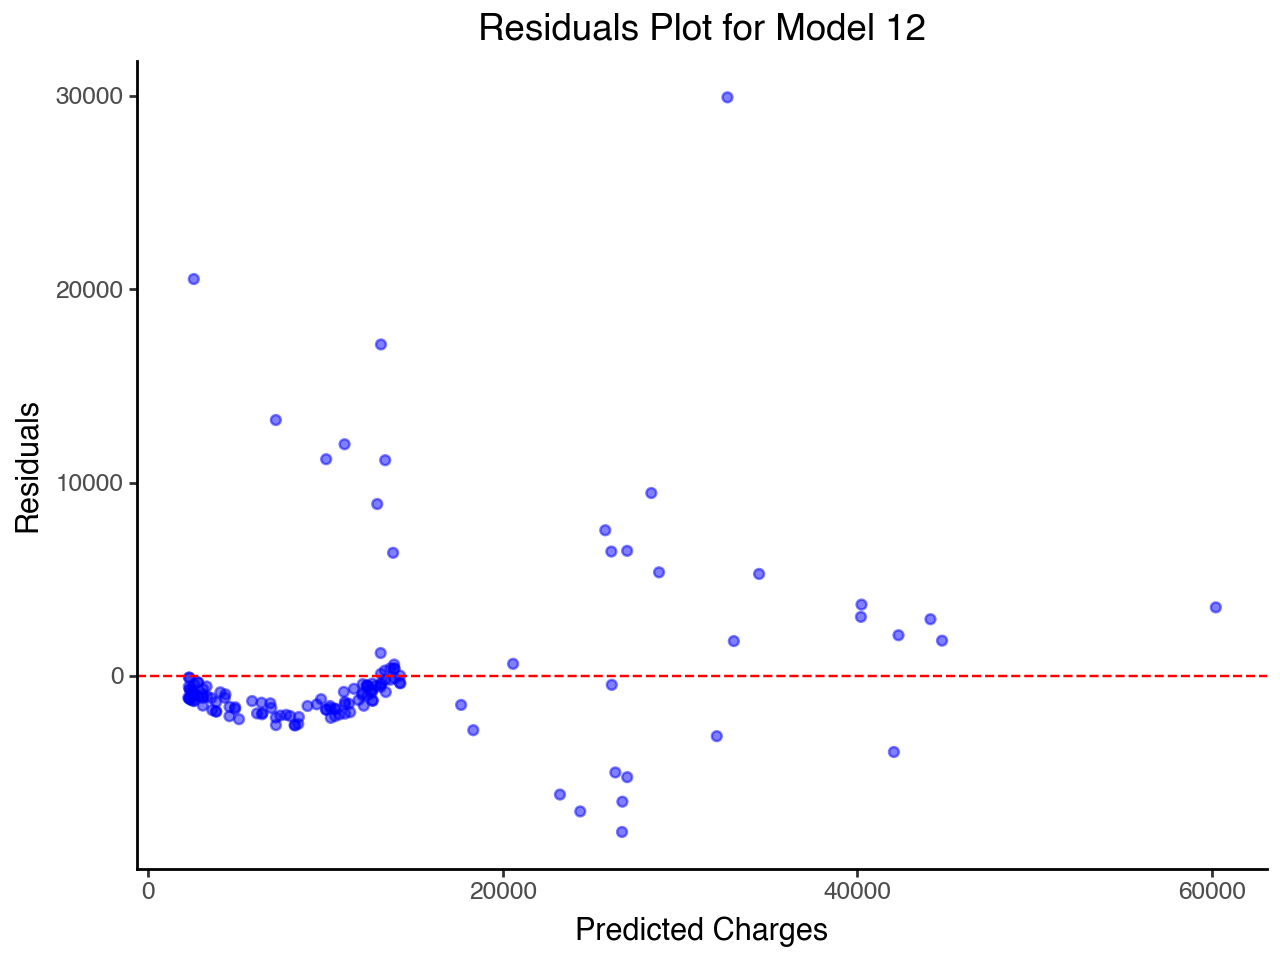

In [237]:
from plotnine import geom_hline, labs

# Create a DataFrame with predicted values and residuals
residuals = y_test - y_preds
residuals_df = pd.DataFrame({
    'Predicted Charges': y_preds,
    'Residuals': residuals
})

# Create the ggplot residuals plot
residual_plot = (
    ggplot(residuals_df, aes(x='Predicted Charges', y='Residuals')) +
    geom_point(color= "blue", alpha= .5) +
    geom_hline(yintercept=0, color='red', linetype='--') +
    labs(
        title="Residuals Plot for Model 12",
        x="Predicted Charges",
        y="Residuals"
    ) +
    theme_classic()
)

residual_plot.show()


# Part Five: Full Exploration
Using any variables in this dataset, and any polynomial of those variables, find the model that best predicts on the new data after being fit on the original data.

Make a plot showing the residuals of your final chosen model.


In creating the model here are the predictors I took into account and tested with:

- Smoker : Has the biggest effect on charges
- Age : has an upward trend correlated to charges for both smokers and non-smokers
- Age^2 : See that the trend is not fully linear, so will capture with a squared predictor
- Age^2*Smoker : Use the quadratic shape of age along with smokers
- BMI : Gives some insight on spending
- BMI*Smoker : See some upwards pattern when looking at people who smoker
- Region*Smoker : See some variation between the regions for smokers

In [341]:
# Set up data for regression
insurance = pd.read_csv("/Users/dan/calpoly/BusinessAnalytics/GSB544MACHINE/Week6/data/insurance_costs_1.csv")
insurance2 = pd.read_csv("/Users/dan/calpoly/BusinessAnalytics/GSB544MACHINE/Week6/data/insurance_costs_2.csv")
# Create dummy variables for smoker and regions
insurance_dummies = pd.get_dummies(insurance, columns=['region', 'smoker'], prefix=['region','smoker'], prefix_sep='_', dtype= int)
insurance2_dummies = pd.get_dummies(insurance2, columns=['region', 'smoker'], prefix=['region','smoker'], prefix_sep='_', dtype= int)
# Create age squared term
insurance_dummies["age_squared"] = insurance_dummies["age"] ** 2
insurance2_dummies["age_squared"] = insurance2_dummies["age"] ** 2
# Create age cubed term
insurance_dummies["age_cubed"] = insurance_dummies["age"] ** 3
insurance2_dummies["age_cubed"] = insurance2_dummies["age"] ** 3
# Create BMI squared term
insurance_dummies["bmi_squared"] = insurance_dummies["bmi"] ** 2
insurance2_dummies["bmi_squared"] = insurance2_dummies["bmi"] ** 2

insurance_dummies.head()

,age,sex,bmi,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,age_squared,age_cubed,bmi_squared
0,19,female,27.900,16884.92400,0,0,0,1,0,1,361,6859,778.410000
1,33,male,22.705,21984.47061,0,1,0,0,1,0,1089,35937,515.517025
2,32,male,28.880,3866.85520,0,1,0,0,1,0,1024,32768,834.054400
3,31,female,25.740,3756.62160,0,0,1,0,1,0,961,29791,662.547600
4,60,female,25.840,28923.13692,0,1,0,0,1,0,3600,216000,667.705600


In [346]:

# Create ct and set up interactions
ctfinal = ColumnTransformer(
    [
        ("standardize", StandardScaler(), ["age", "bmi", "age_squared", "age_cubed", "bmi_squared"]),
        ("age_smoker_interaction", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), ["age", "smoker_yes"]),
        ("age2_smoker_interaction", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), ["age_squared", "smoker_yes"]),
        ("bmi_smoker_interaction", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), ["bmi", "smoker_yes"]),
        ("bmi_age_interaction", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), ["bmi", "age"]),
        #("northeast_smoker_interaction", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), ["region_northeast", "smoker_yes"]),
        #("northwest_smoker_interaction", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), ["region_northwest", "smoker_yes"]),
        #("southeast_smoker_interaction", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), ["region_southeast", "smoker_yes"]),
        #("southwest_smoker_interaction", PolynomialFeatures(degree=2, interaction_only=True, include_bias=False), ["region_southwest", "smoker_yes"])
    ],
    remainder="drop"
)

# Create pipeline
lr_pipeline = Pipeline(
  [("preprocessing", ctfinal),
  ("poly", PolynomialFeatures(degree=1)),
  ("linear_regression", LinearRegression())]
)

# train with old data
y_train = insurance_dummies["charges"]
X_train = insurance_dummies[["age","age_squared","bmi","smoker_yes", "age_cubed", "bmi_squared"]]#"smoker_no","region_northeast", "region_northwest", "region_southeast", "region_southwest"]]
# test with new data
y_test = insurance2_dummies["charges"]
X_test = insurance2_dummies[["age","age_squared","bmi","smoker_yes","age_cubed", "bmi_squared"]]#"smoker_no","region_northeast", "region_northwest", "region_southeast", "region_southwest"]]

# Fit using test/train data
lr_pipeline_fitted = lr_pipeline.fit(X_train, y_train)
y_preds = lr_pipeline_fitted.predict(X_test)

# Calcuate r squared
r2 = r2_score(y_test, y_preds)
mse = sk.metrics.mean_squared_error(y_test, y_preds)

# Finding the regression coefficients
linear_model = lr_pipeline_fitted.named_steps['linear_regression']  # Access the fitted LinearRegression model
coefficients = linear_model.coef_  # Get the coefficients
intercept = linear_model.intercept_  # Get the intercept

print(f"{'Model':<12} {'MSE':<15} {'R2':<10}")
print(f"{'Final Model':<12} {round(mse, 2):<15} {round(r2, 2):<10}")

Model        MSE             R2        
Final Model  21268520.36     0.86      


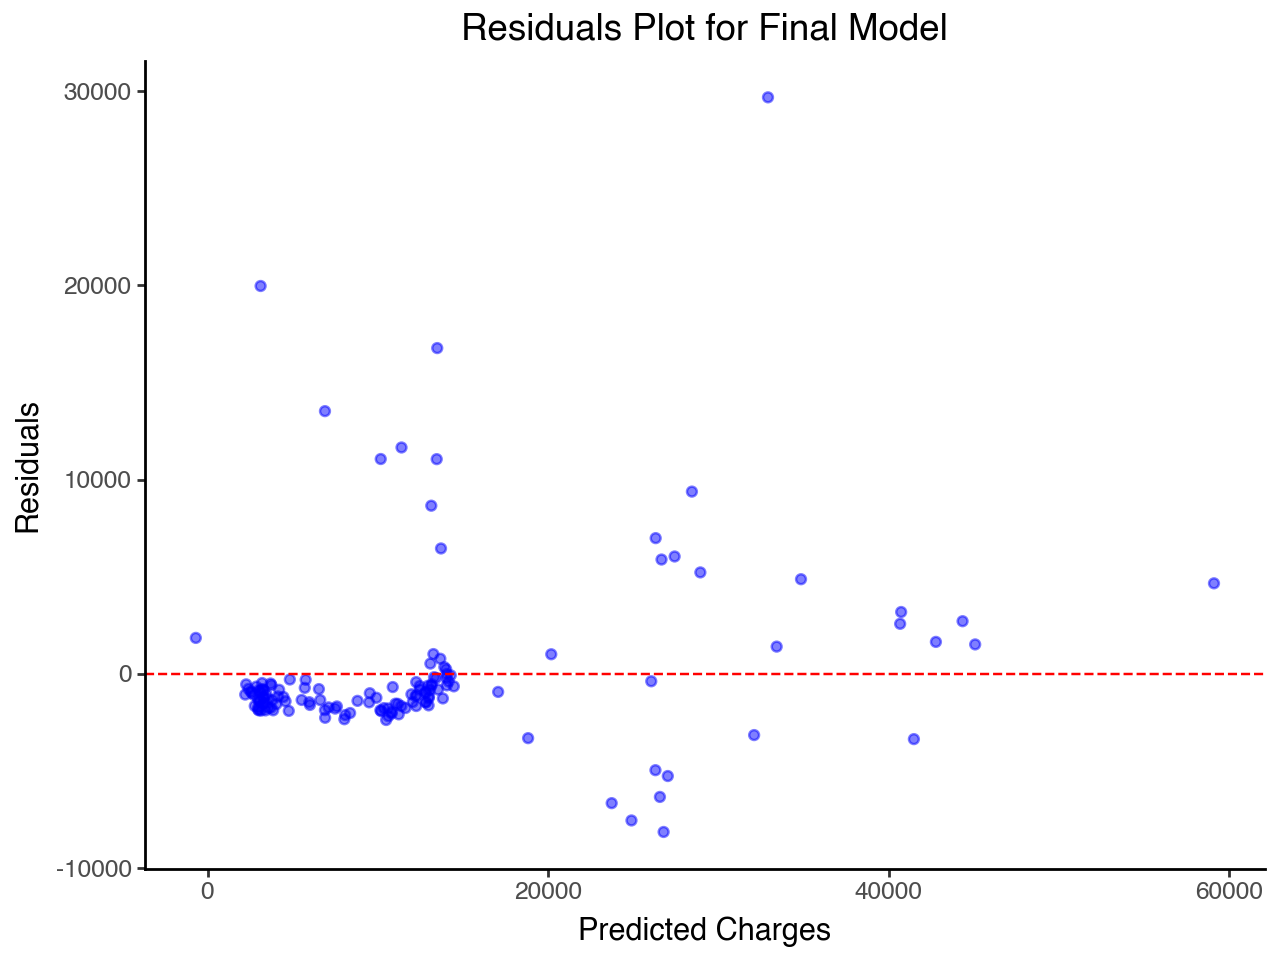

In [347]:
# Create a DataFrame with predicted values and residuals
residuals = y_test - y_preds
residuals_df = pd.DataFrame({
    'Predicted Charges': y_preds,
    'Residuals': residuals
})

# Create the ggplot residuals plot
residual_plot = (
    ggplot(residuals_df, aes(x='Predicted Charges', y='Residuals')) +
    geom_point(color= "blue", alpha= .5) +
    geom_hline(yintercept=0, color='red', linetype='--') +
    labs(
        title="Residuals Plot for Final Model",
        x="Predicted Charges",
        y="Residuals"
    ) +
    theme_classic()
)

residual_plot.show()

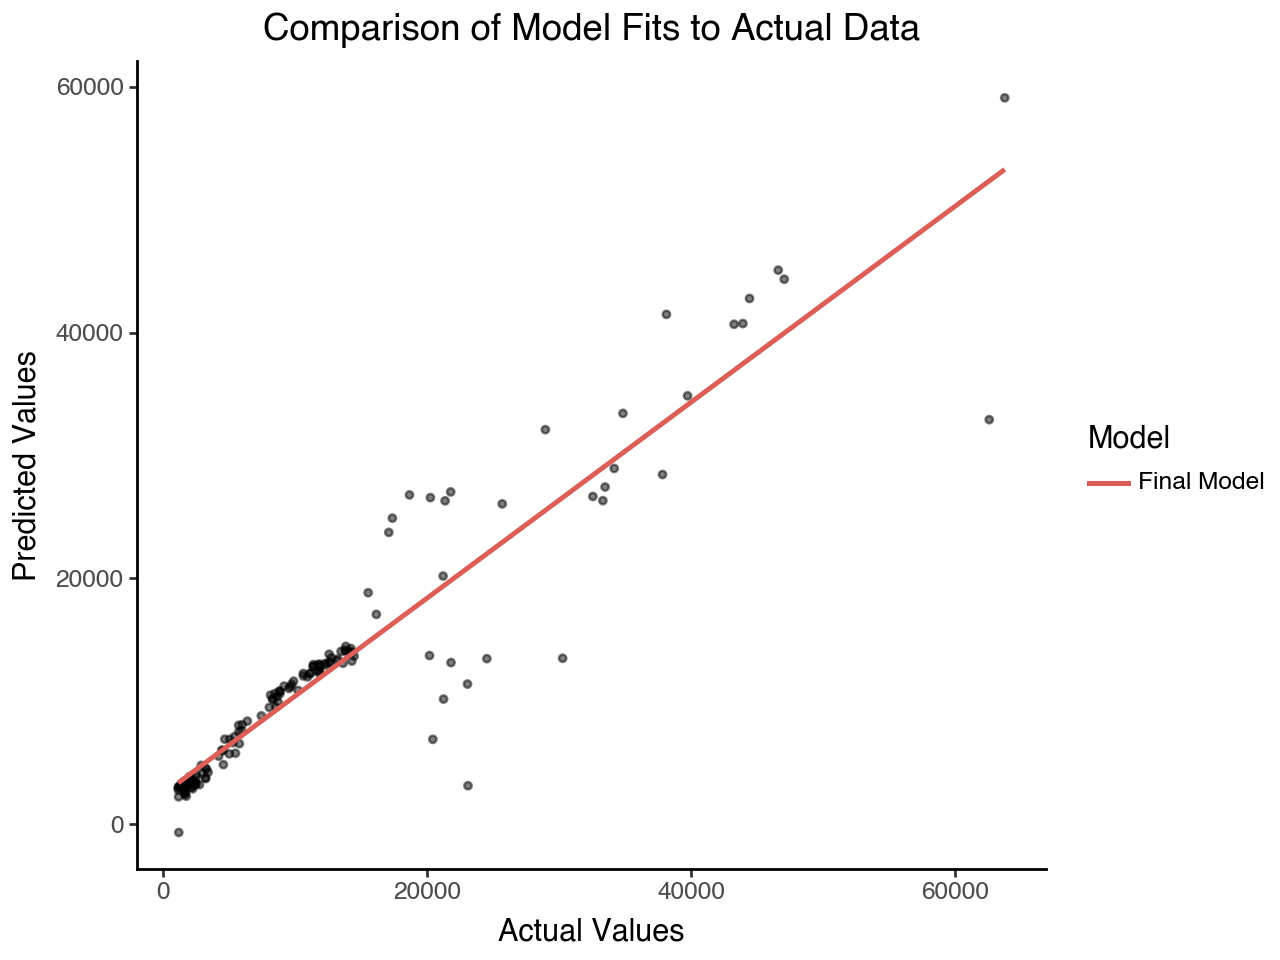

In [348]:
plot_data = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_preds,
        'Model': "Final Model"})

plot_regression = (
    ggplot(plot_data, aes(x='Actual', y='Predicted')) +
    geom_point(color='black', alpha=0.5, size=1) +
    geom_smooth(aes(color='Model'), method='lm', se=False, linetype="solid") +
    labs(title="Comparison of Model Fits to Actual Data",
         x="Actual Values",
         y="Predicted Values") +
    theme_classic()
)

plot_regression.show()

In making my final model, I ended up not using any of the interaction variables between the regions. I found that including them confused the model more than it gave insight. I also experimented with the degree of the model, but when increasing the degree found a worse fit. This makes sense because where the model is predicting the best is on non-smokers, and they seem to follow a close to linear relation. I also added an age cubed term and a BMI squared term to further explain the shape of charges as age and BMI increase. I also added an interaction term between age and BMI. I got an R-squared term of 0.86, indicating that the model explains 86% of the data; tied for the highest score we have seen. And we also get a mean squared error of 21,268,520.36, the lowest we have seen. Thus, this final model is the best fit we have found for the data. 